In [1]:
from vox.numpy.transform_3d.gaussian_blur import GaussianBlur
import numpy as np
import nibabel as nib
from vox.viz import grid_view
from vox.utils import one_hot
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,10)

vox_path = '../asset/data/sa.nii.gz'
vox_gt_path = '../asset/data/sa_gt.nii.gz'
ED = 0
ES = 7

In [2]:
def read_nii_gz(path):
    nib_vol = nib.load(path)
    data = nib_vol.get_fdata()
    affine = nib_vol.affine
    return nib_vol, data, affine

In [3]:
vox, vox_data, vox_affine = read_nii_gz(vox_path)
vox_gt, vox_gt_data, vox_gt_affine = read_nii_gz(vox_gt_path)

In [4]:
print('vox data: ', vox_data.shape)
print('vox gt data: ', vox_gt_data.shape)
vox_ed_data = vox_data[:, :, :, ED]
vox_gt_ed_data = vox_gt_data[:, :, :, ED]
print('vox ed data: ', vox_ed_data.shape)
print('vox gt ed data: ', vox_gt_ed_data.shape)

vox data:  (208, 256, 12, 25)
vox gt data:  (208, 256, 12, 25)
vox ed data:  (208, 256, 12)
vox gt ed data:  (208, 256, 12)


In [5]:
translator_fn = GaussianBlur()

inp, mask = translator_fn(vox_ed_data, vox_gt_ed_data, 0.9)

In [6]:
print(inp.shape)
print(mask.shape)

(208, 256, 12)
(208, 256, 12)


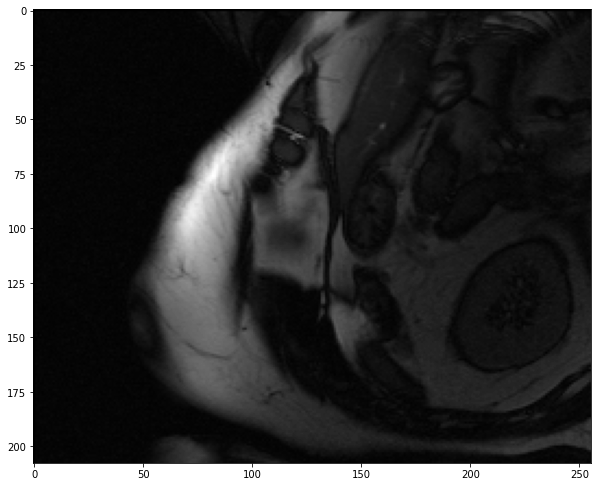

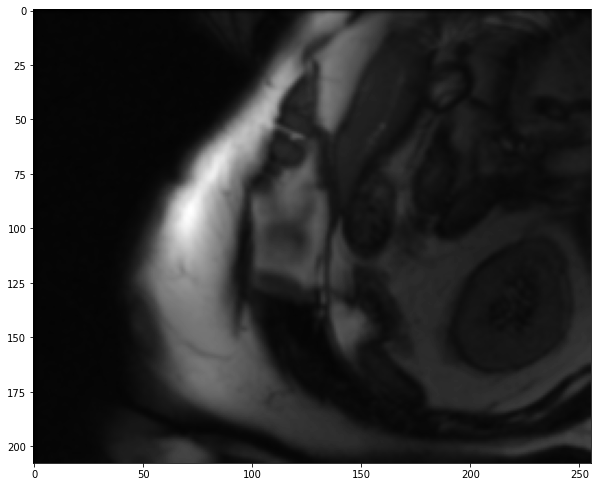

In [7]:
plt.imshow(vox_ed_data[:,:,0], cmap='gray')
plt.show()

plt.imshow(inp[:,:,0], cmap='gray')
plt.show()

In [8]:
# for i in range(vox_gt_ed_data.shape[2]):
#     plt.imshow(vox_gt_ed_data[:,:,i] / (vox_gt_ed_data[:,:,i].max() + 0.0001), cmap='gray')
#     plt.show()
# #     print(mask[:,:,i].max())
# #     print(mask[:,:,i].min())
#     print(np.round(vox_gt_ed_data[:,:,i]).max())
#     print(np.round(mask[:,:,i]).max())
#     print(mask[:,:,i].max())
#     plt.imshow(np.round(mask[:,:,i]) / (mask[:,:,i].max() + 0.0001), cmap='gray')
#     plt.show()
#     print('=================================================')

In [9]:
# print(mask[:,:,10].max())
# print(vox_gt_ed_data[:,:,:10].max())

In [10]:
# for i in range(vox_ed_data.shape[2]):
#     print(vox_ed_data[:,:,i].max())
#     print(vox_ed_data[:,:,i].min())
#     print('--')
#     print(inp[:,:,i].max())
#     print(inp[:,:,i].min())
#     print('=================================================')

(208, 256, 12)


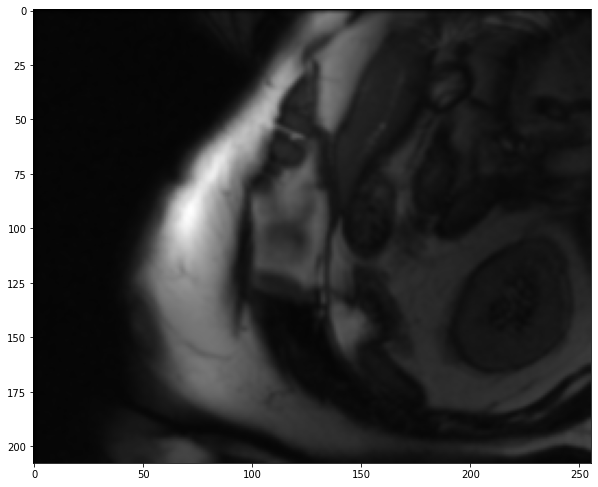

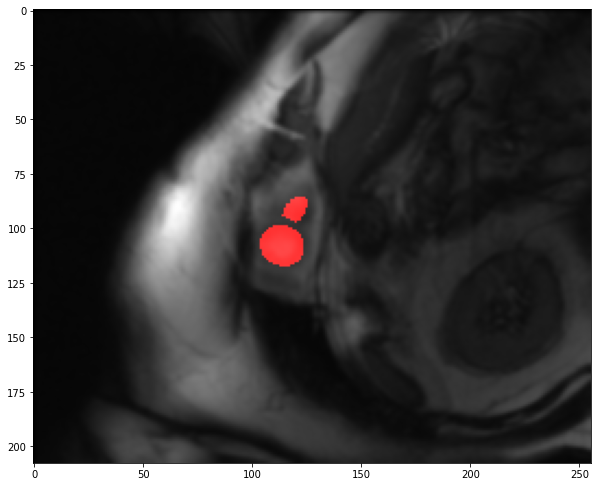

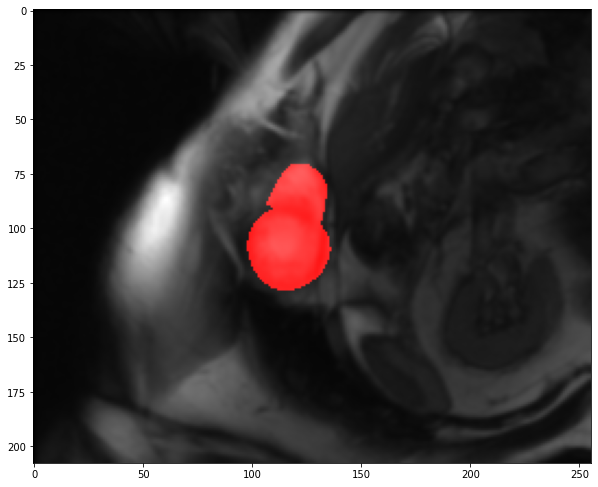

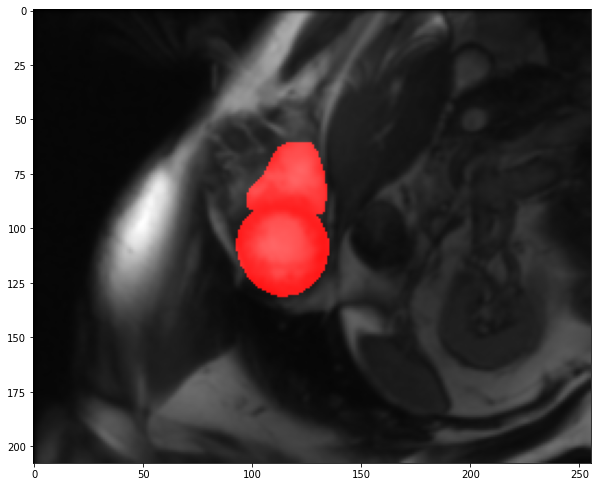

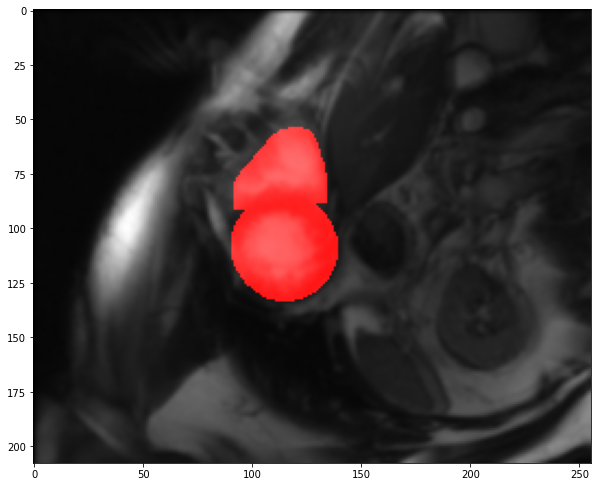

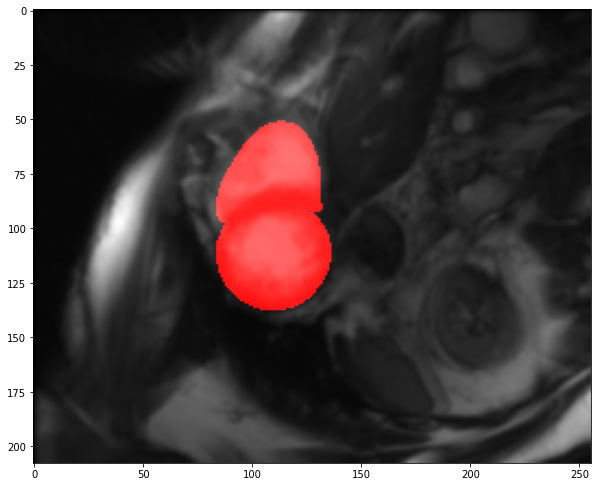

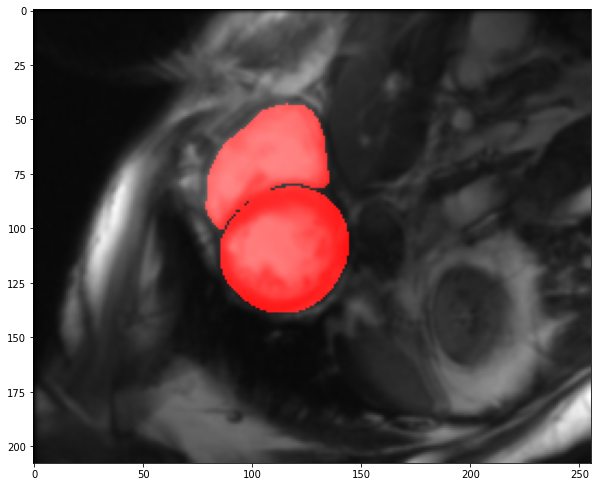

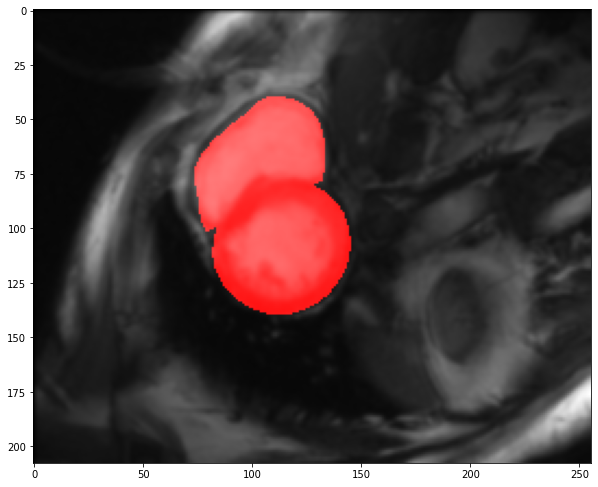

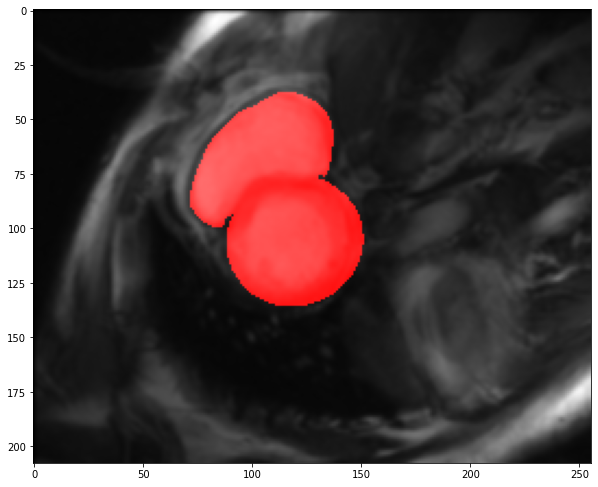

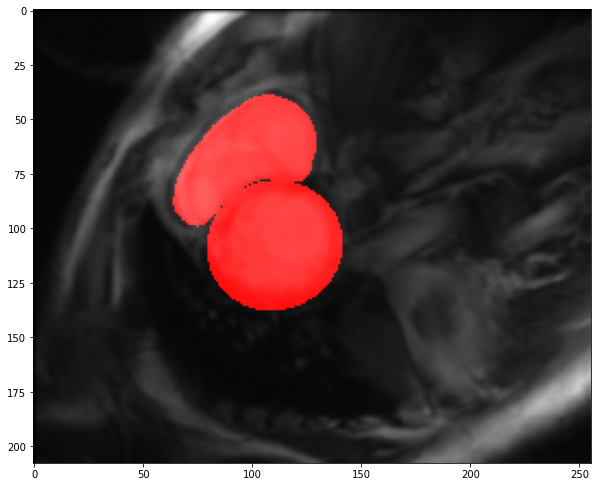

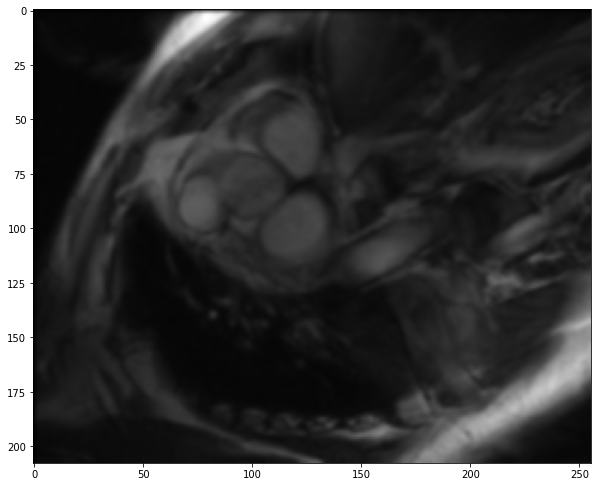

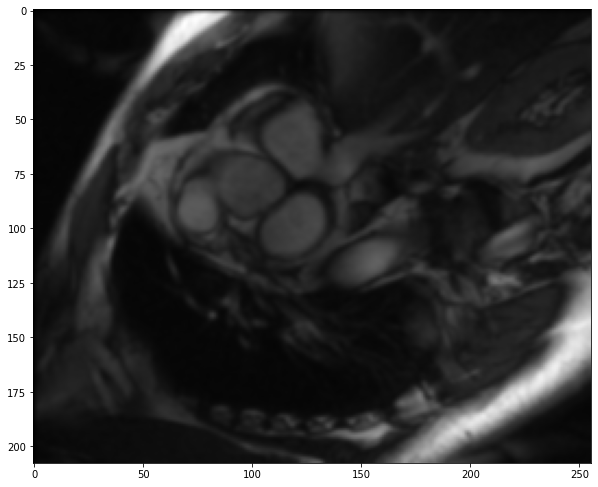

In [11]:
print(inp.shape)
for i in range(inp.shape[2]):
    img_i = inp[:,:, i]
    mask_i = mask[:,:, i]
    
    img_i = np.expand_dims(img_i, axis=0) / (img_i.max() + 0.00001)
    mask_i = np.expand_dims(mask_i, axis=0) * np.expand_dims(np.expand_dims(np.array([255., 0., 0.]), axis=1), axis=1)
    
    img = np.clip(img_i + mask_i / 30, a_min=0.0, a_max=1.0)
    
    plt.imshow(img.transpose((1, 2, 0)))
    plt.show()
    print('=================================================')